<a href="https://colab.research.google.com/github/Soumiksb06/LGMVIP/blob/DataScience/Task_02_01_EDA_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
rawdata = open("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(encoding)
data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding=encoding)

# Display the first few rows of the dataset
data.head()

Windows-1252


<ipython-input-34-0dd97992fef8>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding=encoding)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [35]:
#info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [36]:
# Check for missing values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
# Summary statistics
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


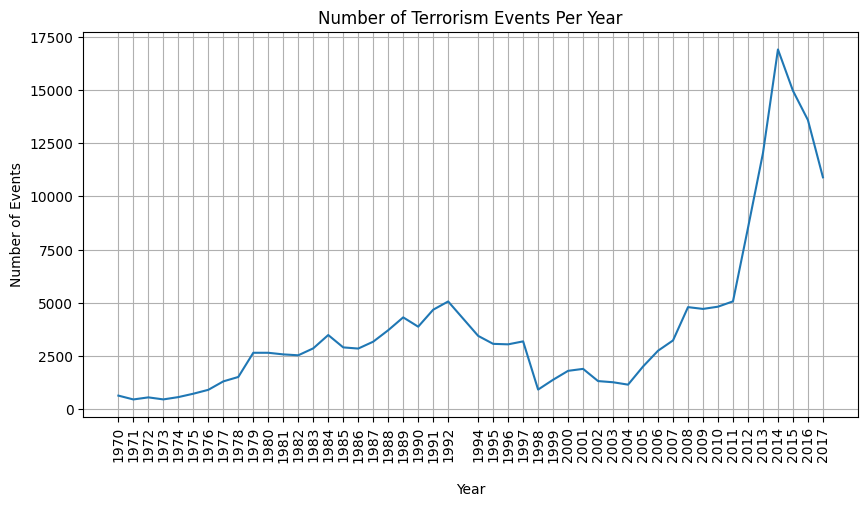

In [51]:
# Group the data by year and count the number of events in each
year_counts = data['iyear'].value_counts()

# Plot the number of events per year
plt.figure(figsize=(10,5))
year_counts.sort_index().plot()
plt.title('Number of Terrorism Events Per Year')
plt.xlabel('Year',labelpad=15)
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(data['iyear'].unique(), rotation=90)
plt.show()

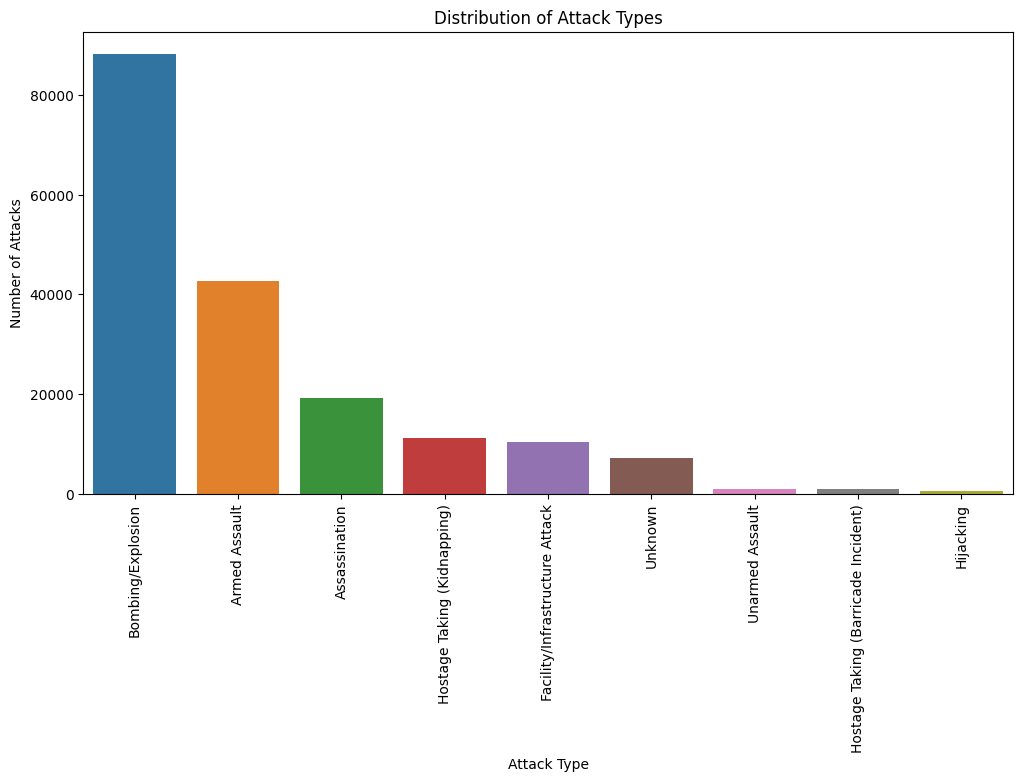

In [ ]:
# Plot the distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(x='attacktype1_txt', data=data, order=data['attacktype1_txt'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

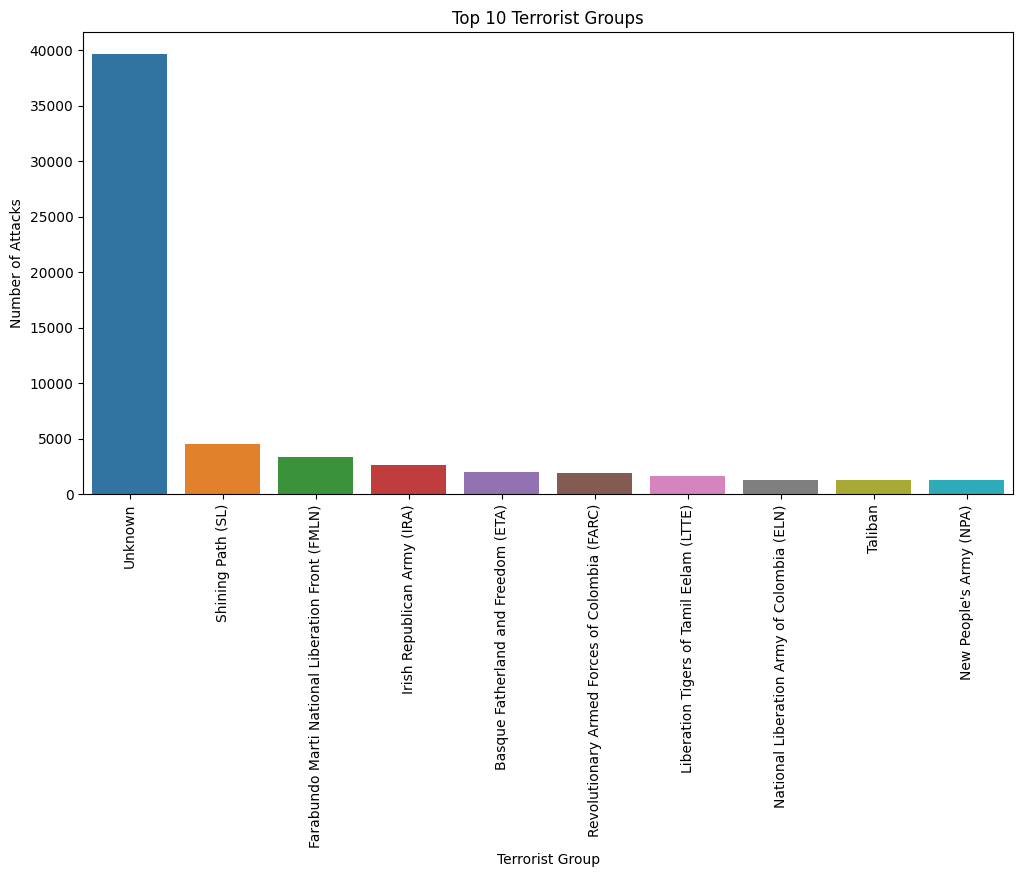

In [ ]:
# Plot the distribution of terrorist groups
plt.figure(figsize=(12, 6))
sns.barplot(x=data['gname'].value_counts().head(10).index, y=data['gname'].value_counts().head(10).values)
plt.title('Top 10 Terrorist Groups')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

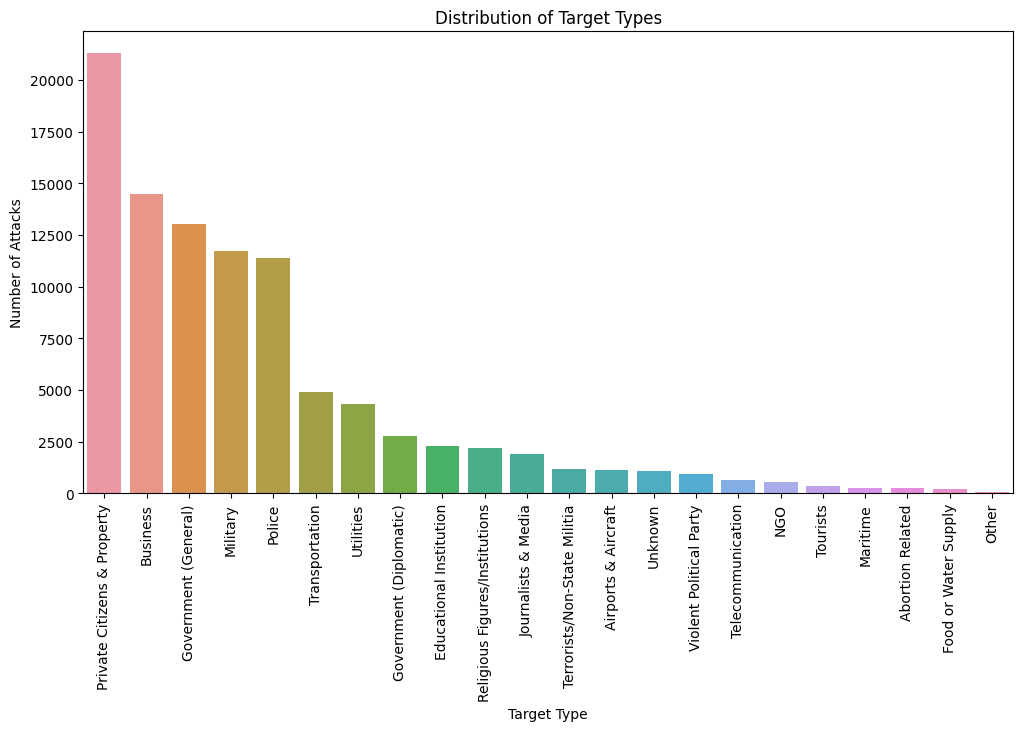

In [ ]:
# Plot the distribution of target types
plt.figure(figsize=(12, 6))
sns.countplot(x='targtype1_txt', data=data, order=data['targtype1_txt'].value_counts().index)
plt.title('Distribution of Target Types')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

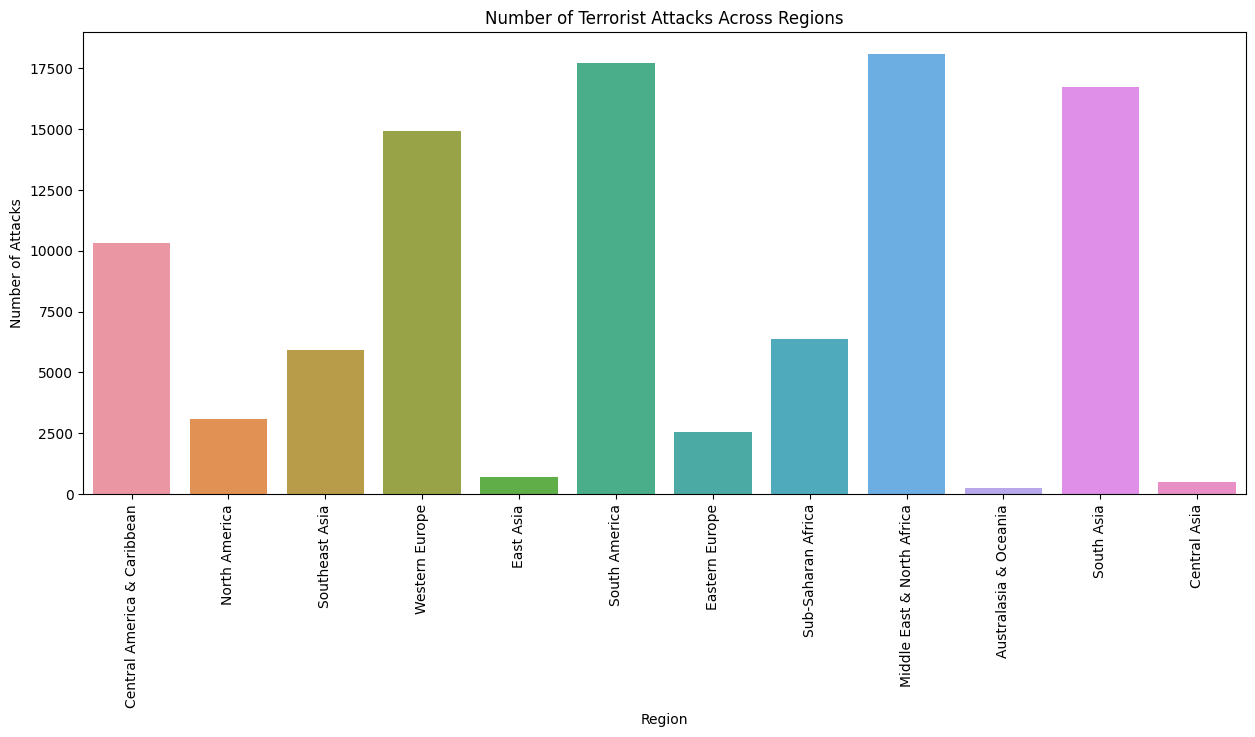

In [ ]:
# Explore the distribution of attacks across regions
plt.figure(figsize=(15, 6))
sns.countplot(x='region_txt', data=data)
plt.title('Number of Terrorist Attacks Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

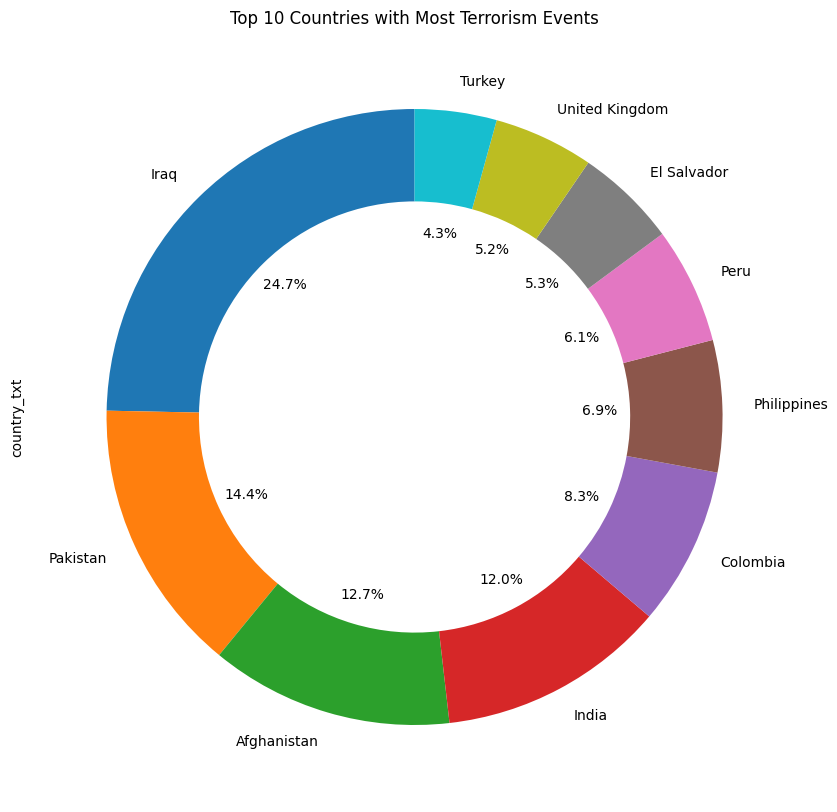

In [ ]:
# Assuming 'data' is your DataFrame
country_counts = data['country_txt'].value_counts()

# Plot the top 10 countries with a pie chart
plt.figure(figsize=(10, 10))
country_counts[:10].plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Top 10 Countries with Most Terrorism Events')
plt.show()

In [ ]:
import plotly.express as px

# Replace NaN values in 'nkill' column with 0
data['nkill'].fillna(0, inplace=True)

# Create an interactive scatter plot
fig = px.scatter_geo(
    data,
    lat='latitude',
    lon='longitude',
    color='region_txt',
    size='nkill',  # You can change this to any other numeric column
    hover_name='country_txt',
    projection='natural earth',
    title='Hot Zones of Terrorism',
)

fig.show()